Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

1. Realizará una solicitud HTTP GET a la siguiente url.

2. Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

3. Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

4. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:

"coche": Nombres de los coches.

"precio_rebajado": Precios rebajados.

"precio_original": Precios originales.

"km": Kilómetros recorridos.

5. Retornará el DataFrame resultante.

6. Una vez extraída toda la información deberéis almacenar toda la información en un DataFrame

In [5]:
def scrape_coches_ocasion():
    pass

In [1]:
# antes de empezar importamos las librerías que vamos a usar. 
# Importar librerías para web scraping y manipulación de datos
# -----------------------------------------------------------------------
from bs4 import BeautifulSoup

# Uso de API's
# -----------------------------------------------------------------------
import requests

# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importar librerías para procesamiento de texto
# -----------------------------------------------------------------------
import re

In [2]:
url = "https://www.ocasionplus.com/coches-segunda-mano?v2&orderBy=morePopular"

In [3]:
res = requests.get(url)

In [4]:
res.status_code

200

In [5]:
datos = BeautifulSoup(res.content, "html.parser")

<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="image" href="/hera/icons/filters/car.svg" rel="preload"/>
  <link as="image" href="/hera/icons/filters/motorbike.svg" rel="preload"/>
  <link as="image" fetchpriority="high" href="https://images.grupoocasionplus.com/VkD6x3MUL7ZrFP44UIIbJThMf7z02_aCLH7ORcNYc-c/mobilex2ao/aHR0cHM6Ly9mb3Rvcy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDcvODUvMjQvNDEvOS94MDEuanBnPzE0ODc0ODA5ODM2" rel="preload"/>
  <link as="image" href="/icons/star-yellow.svg" rel="preload"/>
  <link as="image" href="/icons/star-half-yellow.svg" rel="preload"/>
  <link data-precedence="next" href="/hera/_next/static/css/49a744e57e408eb7.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/69edc7f48c29c633.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/5900753122d69c03.css" rel="stylesheet"/>
  <link data-p
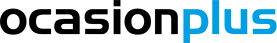

In [6]:
print(datos.prettify())

In [11]:
datos.find("span", {"class":"cardVehicle_spot__e6YZx"})

<span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Audi A3</span>

In [12]:
datos.find_all("span", {"data-test":"span-brand-model"})
# para encontrar las marcas

[<span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Audi A3</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">KIA EV6</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Tesla Model Y</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Ford Focus</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Skoda Kamiq</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Audi A3</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Opel Astra</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Seat Ibiza</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Mini Countryman</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Mini Countryman</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Volkswagen Taigo</span>,
 <span class="cardVehicle_spot__

In [13]:
datos.find_all("span", {"data-test":"span-price"})
# para encontrar el precio

[<span class="cardVehicle_spot__e6YZx" data-test="span-price">18.990€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">36.990€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">40.990€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">22.700€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">22.890€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">16.800€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">24.490€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">24.490€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">24.890€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">24.990€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">20.490€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">18.890€</span>,
 <span class="cardVehicle_spot__e6YZx" data-test="span-price">18

In [14]:
datos.find_all("span", {"data-test":"span-finance"})
# para encontrar el precio financiado (rebajado)

[<span class="cardVehicle_finance__SG6JV" data-test="span-finance">14.537€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">29.082€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">34.773€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">18.091€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">17.719€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">17.450€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">13.446€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">9.200€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">22.264€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">22.264€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">22.628€</span>,
 <span class="cardVehicle_finance__SG6JV" data-test="span-finance">21.819€</span>,
 <spa

In [15]:
datos.find_all("span", {"data-test":"span-km"})
# para encontrar los km

[<span class="characteristics_elements__Mb1S_" data-test="span-km">91.988 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">13.298 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">11.421 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">62.596 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">44.112 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">139.759 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">60.933 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">151.118 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">98.648 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">114.894 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span-km">29.476 Km</span>,
 <span class="characteristics_elements__Mb1S_" data-test="span

In [ ]:
# sacamos los nombres
coche = []

for marca in datos.find_all("span", {"data-test":"span-brand-model"}):
    coche.append(marca.text)

coche

['Audi A3',
 'KIA EV6',
 'Tesla Model Y',
 'Ford Focus',
 'Skoda Kamiq',
 'Audi A3',
 'Opel Astra',
 'Seat Ibiza',
 'Mini Countryman',
 'Mini Countryman',
 'Volkswagen Taigo',
 'Renault Clio',
 'Peugeot Boxer',
 'Seat León',
 'BMW Serie 3',
 'Hyundai Bayon',
 'Ford Focus',
 'Hyundai Kona',
 'Mercedes Clase C',
 'Audi A3']

In [22]:
precio1 = datos.find_all("span", {"data-test":"span-price"})[0].text

In [24]:
precio1.replace("€", "").replace(".", "")

'18990'

In [25]:
# sacamos los precios
precio_original = []

for precio in datos.find_all("span", {"data-test":"span-price"}):
    precio_original.append(float(precio.text.replace("€", "").replace(".", "")))

precio_original

[18990.0,
 36990.0,
 40990.0,
 22700.0,
 22890.0,
 16800.0,
 24490.0,
 24490.0,
 24890.0,
 24990.0,
 20490.0,
 18890.0,
 18900.0,
 25450.0,
 22490.0]

In [26]:
# sacamos los precios rebajados
precio_rebajado = []

for precio_r in datos.find_all("span", {"data-test":"span-finance"}):
    precio_rebajado.append(float(precio_r.text.replace("€", "").replace(".", "")))

precio_rebajado

[14537.0,
 29082.0,
 34773.0,
 18091.0,
 17719.0,
 17450.0,
 13446.0,
 9200.0,
 22264.0,
 22264.0,
 22628.0,
 21819.0,
 18628.0,
 15290.0,
 12990.0,
 17173.0,
 17182.0,
 20810.0,
 16650.0,
 20446.0]

In [33]:
# sacamos los km
kms = []

for km in datos.find_all("span", {"data-test":"span-km"}):
    kms.append(km.text.replace(" Km", "").replace(".", ""))

kms

['91988',
 '13298',
 '11421',
 '62596',
 '44112',
 '139759',
 '60933',
 '151118',
 '98648',
 '114894',
 '29476',
 '65866',
 '70684',
 '135457',
 '184206',
 '8457',
 '31540',
 '21026',
 '105857',
 '109932']

In [34]:
dict_coches_ocasion = {"coche":coche, "precio_original":precio_original, "precio_rebajado": precio_rebajado, "kms":kms }

In [35]:
df=pd.DataFrame(dict_coches_ocasion)

ValueError: All arrays must be of the same length

In [36]:
url = "https://www.ocasionplus.com/coches-segunda-mano?v2&orderBy=morePopular"
coches_ocasion = {"coche":[], "precio_original":[], "precio_rebajado":[], "kms":[] }

def scrape_coches_ocasion(url):
    res = requests.get(url)
    if res.status_code != 200:
        print("Error")
        
    else:
        datos = BeautifulSoup(res.content, "html.parser")
        for marca in datos.find_all("span", {"data-test":"span-brand-model"}):
            coches_ocasion["coche"].append(marca.text)
        for precio in datos.find_all("span", {"data-test":"span-price"}):
            coches_ocasion["precio_original"].append(float(precio.text.replace("€", "").replace(".", "")))
        for precio_r in datos.find_all("span", {"data-test":"span-finance"}):
            coches_ocasion["precio_rebajado"].append(float(precio_r.text.replace("€", "").replace(".", "")))
        for km in datos.find_all("span", {"data-test":"span-km"}):
            coches_ocasion["kms"].append(km.text.replace(" Km", "").replace(".", ""))



In [37]:
coches_ocasion
# tenemos que revisarlo, no cargó nada....

{'coche': [], 'precio_original': [], 'precio_rebajado': [], 'kms': []}